In [1]:
# import packages

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# setting path

path = 'C:\Python\webscrape'
os.chdir(path) 

In [2]:
# reading from csv

data = pd.read_csv('steam_sales May, 12, 2019.txt', delimiter = '*', error_bad_lines = False)

b'Skipping line 2046: expected 6 fields, saw 7\nSkipping line 4379: expected 6 fields, saw 7\nSkipping line 4628: expected 6 fields, saw 7\nSkipping line 6310: expected 6 fields, saw 7\nSkipping line 8265: expected 6 fields, saw 7\nSkipping line 8802: expected 6 fields, saw 7\nSkipping line 9020: expected 6 fields, saw 7\nSkipping line 9259: expected 6 fields, saw 7\nSkipping line 11112: expected 6 fields, saw 7\nSkipping line 11113: expected 6 fields, saw 7\nSkipping line 11114: expected 6 fields, saw 7\nSkipping line 11115: expected 6 fields, saw 7\nSkipping line 11116: expected 6 fields, saw 7\nSkipping line 11117: expected 6 fields, saw 7\nSkipping line 11118: expected 6 fields, saw 7\nSkipping line 11119: expected 6 fields, saw 7\nSkipping line 11120: expected 6 fields, saw 7\nSkipping line 11121: expected 6 fields, saw 7\nSkipping line 11122: expected 6 fields, saw 7\nSkipping line 11123: expected 6 fields, saw 7\nSkipping line 11124: expected 6 fields, saw 7\nSkipping line 11125

In [3]:
data.head()

,title,date,reviews,discount,original price,discounted price
0,Dota 2,9 Jul 2013,Very Positive,NaN,Free to Play,NaN
1,MORDHAU,29 Apr 2019,Mostly Positive,NaN,CDN$ 33.99,NaN
2,Stellaris,9 May 2016,Mostly Positive,-75%,CDN$ 43.99,CDN$ 10.99\t\t\t\t\t\t\t
3,Stellaris: Starter Pack,NaN,Mostly Positive,-66%,CDN$ 88.77,CDN$ 30.03\t\t\t\t\t\t\t
4,Counter-Strike: Global Offensive,21 Aug 2012,Very Positive,NaN,Free to Play,NaN


In [4]:
# converting discount to decimal and replacing NA's with 0

data['discount'] = data['discount'].str.rstrip('%').astype('float') / 100.0 *(-1)
data[['discount','discounted price']] = data[['discount','discounted price']].fillna(value = 0)

In [5]:
data.head()

,title,date,reviews,discount,original price,discounted price
0,Dota 2,9 Jul 2013,Very Positive,0.00,Free to Play,0
1,MORDHAU,29 Apr 2019,Mostly Positive,0.00,CDN$ 33.99,0
2,Stellaris,9 May 2016,Mostly Positive,0.75,CDN$ 43.99,CDN$ 10.99\t\t\t\t\t\t\t
3,Stellaris: Starter Pack,NaN,Mostly Positive,0.66,CDN$ 88.77,CDN$ 30.03\t\t\t\t\t\t\t
4,Counter-Strike: Global Offensive,21 Aug 2012,Very Positive,0.00,Free to Play,0


In [6]:
# converting 'free to play' to 0 and stripping unecessary strings from original price

data = data.replace(to_replace = ['Free to Play', 'Free To Play', 'Free', 'Play for Free!', 
                                  'Free Demo', 'Free Movie', '1 Season', 'Third-party',
                                  'Play Now', 'Free Mod', 'From CDN$ 25.60', 'Install',
                                  'CDN$ 1,200.76', 'From CDN$ 25.31', 'From CDN$ 19.20'], value = np.nan)

data['original price'] = data['original price'].str.lstrip('CDN$ ').astype('float')
data['original price'] = data['original price'].fillna(value = 0)

In [7]:
data.head()

,title,date,reviews,discount,original price,discounted price
0,Dota 2,9 Jul 2013,Very Positive,0.00,0.00,0
1,MORDHAU,29 Apr 2019,Mostly Positive,0.00,33.99,0
2,Stellaris,9 May 2016,Mostly Positive,0.75,43.99,CDN$ 10.99\t\t\t\t\t\t\t
3,Stellaris: Starter Pack,NaN,Mostly Positive,0.66,88.77,CDN$ 30.03\t\t\t\t\t\t\t
4,Counter-Strike: Global Offensive,21 Aug 2012,Very Positive,0.00,0.00,0


In [8]:
# formatting discounted price

data = data.replace(to_replace = 'CDN$ 1,063.85							', value = np.nan)
data['discounted price'] = data['discounted price'].str.lstrip('CDN$ ').str.rstrip('\t\t\t\t\t\t\t').astype('float')
data['discounted price'] = data['discounted price'].fillna(value = data['original price'])

In [9]:
data.head()

,title,date,reviews,discount,original price,discounted price
0,Dota 2,9 Jul 2013,Very Positive,0.00,0.00,0.00
1,MORDHAU,29 Apr 2019,Mostly Positive,0.00,33.99,33.99
2,Stellaris,9 May 2016,Mostly Positive,0.75,43.99,10.99
3,Stellaris: Starter Pack,NaN,Mostly Positive,0.66,88.77,30.03
4,Counter-Strike: Global Offensive,21 Aug 2012,Very Positive,0.00,0.00,0.00


In [10]:
# filling in 'None' reviews and one hot encoding to handle categorical review variable

# to_cut = data['reviews'].unique().tolist()
# to_cut_df = pd.DataFrame(data = {'terms': to_cut})
# to_cut_df.to_csv('to_cut')

# review_order = {'Negative': 0, 'Mostly Negative': 1, 'Mixed': 2,
#               'Mostly Positive': 3, 'Positive': 4, 'Very Positive': 5, 
#               'Overwhelmingly Positive': 6}

# data['reviews label'] = data['reviews'].map(review_order)

data['reviews'] = data['reviews'].fillna(value = 'None')
data = pd.concat([data ,pd.get_dummies(data['reviews'], drop_first = True)],axis=1)
data.drop(['reviews'], axis=1, inplace=True)

In [11]:
data.head()

,title,date,discount,original price,discounted price,Mostly Negative,Mostly Positive,None,Overwhelmingly Positive,Positive,Very Positive
0,Dota 2,9 Jul 2013,0.00,0.00,0.00,0,0,0,0,0,1
1,MORDHAU,29 Apr 2019,0.00,33.99,33.99,0,1,0,0,0,0
2,Stellaris,9 May 2016,0.75,43.99,10.99,0,1,0,0,0,0
3,Stellaris: Starter Pack,NaN,0.66,88.77,30.03,0,1,0,0,0,0
4,Counter-Strike: Global Offensive,21 Aug 2012,0.00,0.00,0.00,0,0,0,0,0,1


In [12]:
# exploratory analysis

data.describe()

,discount,original price,discounted price,Mostly Negative,Mostly Positive,None,Overwhelmingly Positive,Positive,Very Positive
count,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000,26297.000000
mean,0.027135,11.869514,11.300751,0.000228,0.114462,0.391642,0.016428,0.202266,0.255733
std,0.124654,21.446670,19.595859,0.015104,0.318377,0.488127,0.127116,0.401697,0.436280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.290000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.690000,5.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,13.490000,12.990000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,722.790000,722.790000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# training and testing set

train, test = train_test_split(data, test_size=0.2)
train = train[['original price', 'Mostly Negative', 'Mostly Positive', 'None', 'Overwhelmingly Positive',
              'Positive', 'Very Positive']]
test = test[['original price', 'Mostly Negative', 'Mostly Positive', 'None', 'Overwhelmingly Positive',
              'Positive', 'Very Positive']]

In [23]:
train.describe()

,original price,Mostly Negative,Mostly Positive,None,Overwhelmingly Positive,Positive,Very Positive
count,21037.000000,21037.000000,21037.000000,21037.000000,21037.000000,21037.000000,21037.000000
mean,11.988428,0.000190,0.115226,0.390645,0.016685,0.202786,0.255122
std,22.103660,0.013788,0.319302,0.487907,0.128091,0.402084,0.435940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.990000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,722.790000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
test.describe()

,original price,Mostly Negative,Mostly Positive,None,Overwhelmingly Positive,Positive,Very Positive
count,5260.000000,5260.000000,5260.000000,5260.000000,5260.000000,5260.000000,5260.000000
mean,11.393926,0.000380,0.111407,0.395627,0.015399,0.200190,0.258175
std,18.582673,0.019498,0.314665,0.489032,0.123146,0.400181,0.437672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.990000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,429.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


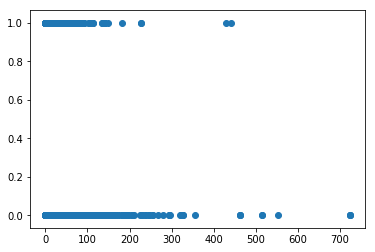

In [25]:
# visualization

plt.scatter(train['original price'], train['None'])

In [28]:
# clustering on training data --LEARN WHAT THE MODEL ACTUALLY MEANS AND ALSO HOW TO VALIDATE WITH TEST DATA

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(train)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4151, cost: 19762.0
Run 1, iteration: 2/100, moves: 1358, cost: 19762.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5818, cost: 24449.0
Run 2, iteration: 2/100, moves: 242, cost: 24449.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 62, cost: 30774.0
Run 3, iteration: 2/100, moves: 0, cost: 30774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4979, cost: 23887.0
Run 4, iteration: 2/100, moves: 576, cost: 23887.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1187, cost: 19762.0
Run 5, iteration: 2/100, moves: 1, cost: 19762.0
Best run was number 1
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 